In [ ]:
import importlib
import torch
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

model_name = "AS_2D_original"
relative_path = os.path.join('..', '..', 'dptorch')

notebook_dir = os.getcwd()
absolute_path = os.path.abspath(os.path.join(notebook_dir, relative_path))

sys.path.insert(0, absolute_path)

#### what to load
checkpoint_file = 7199


model = importlib.import_module(f"{model_name}.Model")

# RNG
torch.manual_seed(123)


# load the specific checkpoint
m = model.SpecifiedModel.load(
    path=os.path.abspath(f"data/Iter_{checkpoint_file}.pth"),
    cfg_override={"distributed": False, "init_with_zeros": False, "MODEL_NAME": model_name},
)



In [11]:
points = np.loadtxt((f"data/V_raw_{checkpoint_file}.txt"))
disc_states = (points[:,2]).astype(np.int64)
mask_0 = disc_states == 0
mask_1 = disc_states == 1
sigma = m.cfg["model"]["params"]["sigma"]
beta = m.cfg["model"]["params"]["beta"]
points_0 = points[mask_0]* (1 - sigma) / (1 - beta)
points_1 = points[mask_1]* (1 - sigma) / (1 - beta)

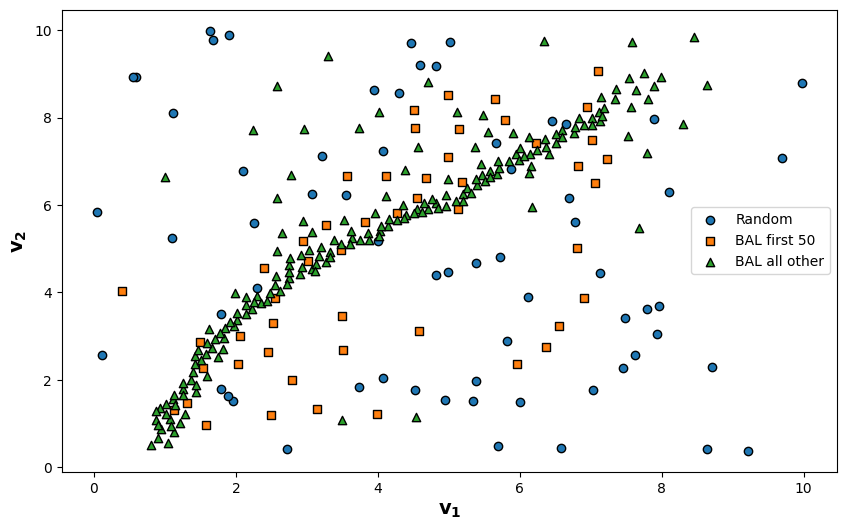

In [12]:
points_set_1 = points_0[:64,:]
points_set_2 = points_0[64:114,:]
points_set_3 = points_0[114:,:]

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot each set of points with different markers and line styles
plt.scatter(points_set_1[:, 0], points_set_1[:, 1], marker='o', edgecolor='black', label='Random')
plt.scatter(points_set_2[:, 0], points_set_2[:, 1], marker='s', edgecolor='black', label='BAL first 50')
plt.scatter(points_set_3[:, 0], points_set_3[:, 1], marker='^', edgecolor='black', label='BAL all other')

# Add labels and legend
plt.xlabel(r"$\mathbf{v_1}$", fontsize=14)
plt.ylabel(r"$\mathbf{v_2}$", fontsize=14)
plt.legend()

# Save the plot to a file
plt.savefig('fernandes_pheland_BAL_points.pdf', dpi=500, bbox_inches='tight')

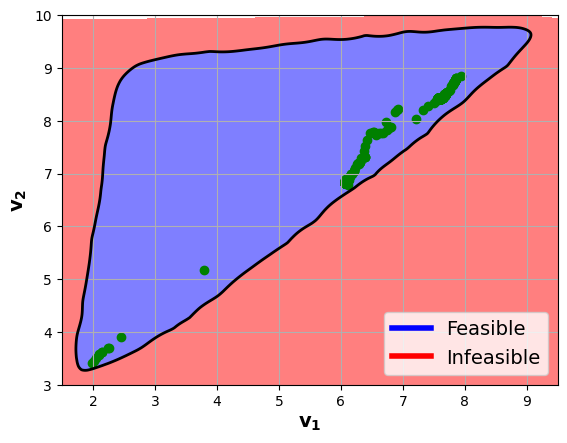

In [ ]:
points = np.loadtxt((f"data/simulation_{checkpoint_file}.txt"))
VF_plot_data = np.loadtxt((f"data/V_func_all_190_0.txt"))

disc_states = (points[:,2]).astype(np.int64)
mask_0 = disc_states == 0
mask_1 = disc_states == 1
points_0 = points[mask_0]
points_1 = points[mask_1]
x_scatter = points_0[:, 0]
y_scatter = points_0[:, 1]

x = (VF_plot_data[:,0])
y = (VF_plot_data[:,1])
from scipy.ndimage import gaussian_filter
z = VF_plot_data[:,2]

from scipy.interpolate import griddata

grid_x, grid_y = np.meshgrid(np.linspace(x.min(), x.max(), 1000), 
                             np.linspace(y.min(), y.max(), 1000))

grid_z = griddata((x.ravel(), y.ravel()), z.ravel(), (grid_x, grid_y), method='cubic')


contour_level = -0.01
plt.contourf(grid_x, grid_y, grid_z, levels=[-np.inf, contour_level], colors='red', alpha=0.5) 
plt.contourf(grid_x, grid_y, grid_z, levels=[contour_level, np.inf], colors='blue', alpha=0.5) 
plt.contour(grid_x, grid_y, grid_z, levels=[contour_level], colors='black', linewidths=2, linestyles='solid')
plt.scatter(x_scatter, y_scatter, marker='o', color='green', label='Simulation')
plt.grid(True)

plt.xticks(np.linspace(0, 10, 11))
plt.yticks(np.linspace(0, 10, 11))


plt.xlim(1.5,9.5)
plt.ylim(3.,10.)

blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Feasible')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Infeasible')
plt.legend(handles=[blue_patch, red_patch], loc='lower right', fontsize=14)

plt.xlabel(r"$\mathbf{v_1}$", fontsize=14)
plt.ylabel(r"$\mathbf{v_2}$", fontsize=14)

plt.savefig('feas_state_with_sim.pdf', dpi=400)